<center><b><h1>ADVERTISING CASE STUDY</h1></b></center>

Steps in Simple Linear Regression Model Building:

1. Package Importation
2. Data Importation
3. Trainig the model
4. Residual analysis
5. Predicting and evaluating of the model on the test set.


<h3> 1. Package Importation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

%matplotlib inline

<h3> 2. Data Importation

In [2]:
ad=pd.read_csv("advertising.csv")
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<h3> 3.Data Inspection

In [3]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
ad.describe(percentiles=[0.25,0.40,0.60,0.80,0.90,0.99])

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
40%,119.000000,17.120000,21.320000,13.360000
50%,149.750000,22.900000,25.750000,16.000000
60%,186.060000,27.860000,32.700000,17.000000
80%,228.540000,38.920000,49.640000,19.920000
90%,261.440000,43.520000,59.070000,21.710000


In [5]:
ad.shape

(200, 4)

In [6]:
ad.values

array([[230.1,  37.8,  69.2,  22.1],
       [ 44.5,  39.3,  45.1,  10.4],
       [ 17.2,  45.9,  69.3,  12. ],
       [151.5,  41.3,  58.5,  16.5],
       [180.8,  10.8,  58.4,  17.9],
       [  8.7,  48.9,  75. ,   7.2],
       [ 57.5,  32.8,  23.5,  11.8],
       [120.2,  19.6,  11.6,  13.2],
       [  8.6,   2.1,   1. ,   4.8],
       [199.8,   2.6,  21.2,  15.6],
       [ 66.1,   5.8,  24.2,  12.6],
       [214.7,  24. ,   4. ,  17.4],
       [ 23.8,  35.1,  65.9,   9.2],
       [ 97.5,   7.6,   7.2,  13.7],
       [204.1,  32.9,  46. ,  19. ],
       [195.4,  47.7,  52.9,  22.4],
       [ 67.8,  36.6, 114. ,  12.5],
       [281.4,  39.6,  55.8,  24.4],
       [ 69.2,  20.5,  18.3,  11.3],
       [147.3,  23.9,  19.1,  14.6],
       [218.4,  27.7,  53.4,  18. ],
       [237.4,   5.1,  23.5,  17.5],
       [ 13.2,  15.9,  49.6,   5.6],
       [228.3,  16.9,  26.2,  20.5],
       [ 62.3,  12.6,  18.3,   9.7],
       [262.9,   3.5,  19.5,  17. ],
       [142.9,  29.3,  12.6,  15. ],
 

In [7]:
ad.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
ad.index

RangeIndex(start=0, stop=200, step=1)

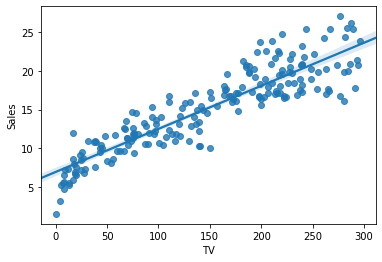

In [9]:
# Visualise the dataset

sns.regplot(x='TV',y='Sales',data=ad)

In [10]:
help(sns.regplot)

Help on function regplot in module seaborn.regression:

regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
    Plot data and a linear regression model fit.
    
    There are a number of mutually exclusive options for estimating the
    regression model. See the :ref:`tutorial <regression_tutorial>` for more
    information.    
    
    Parameters
    ----------
    x, y: string, series, or vector array
        Input variables. If strings, these should correspond with column names
        in ``data``. When pandas objects are used, axes will be labeled with
        the series name.
    data : DataFrame
        Tidy ("long-form") dataframe where each column is a variable and each
  

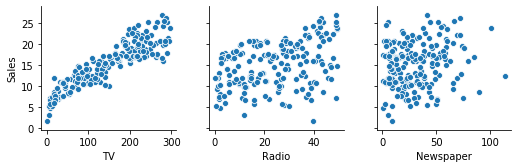

In [11]:
sns.pairplot(data=ad,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

In [12]:
corr=ad.corr()
print(corr)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


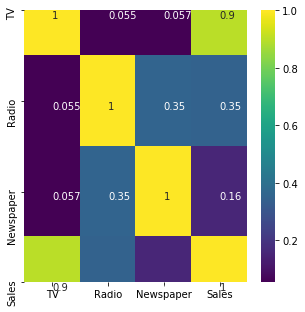

In [13]:
plt.figure(figsize=(5,5))
annot_kws = {"ha":'left',"va":'top'}
uniform_data = np.random.rand(10, 12)
sns.heatmap(corr,annot=True,cmap='viridis',annot_kws=annot_kws)

Since 'TV' is very strongly correlated to 'Sales', let's first build a simple linear regression model with ‘TV’ as the predictor variable.

# 4. MODELLING

#### Performing Simple Linear Regression

#y=c+m1x1+m2x2+-----+mn+xn

#In this case, y=m*TV+c

m and c are called the model parameters or coefficients

In [14]:
# import statsmodels and statsmodels.api as sm
#import Scikit-Learn-SKLearn
import statsmodels
import statsmodels.api as sm
import sklearn

In [15]:
ad.shape

(200, 4)

### Steps: 
1. Create X and y
2. Create Train and Test sets
3. Train the model on training set(learn the coefficents)
4. Evaluate the model on the training set as well as test set.

In [16]:
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [17]:
# Create X and y

X=ad['TV']
y=ad['Sales']

In [18]:
# Train-test split

from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

In [20]:
X_train.shape

(140,)

In [21]:
X_test.shape

(60,)

The Statsmodel library does not include the beta0 value by default.

In [22]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [23]:
# training the model

X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

C:\Users\ashan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [24]:
#fitting the model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [25]:
#Sales=6.94+0.05TV

In [26]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.52e-52
Time:                        20:45:05   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# 1. coeff and p-value
#2. R-Squared
#3. F-statistc is low => the fit is not by chance.

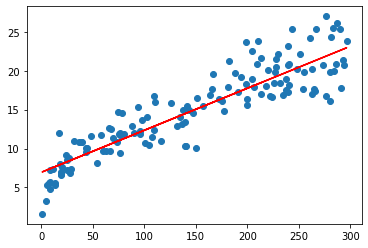

In [28]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948+0.054*X_train,'r')

In [29]:
#error=f(y_train, y_train_pred)
y_train_pred=lr_model.predict(X_train_sm)


In [30]:
res=y_train - y_train_pred

Text(0.5, 1.0, 'Residual plot')

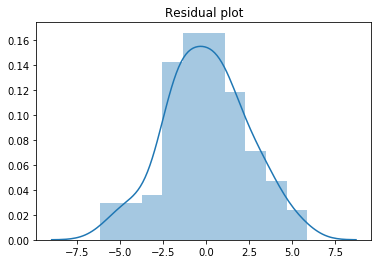

In [31]:
plt.figure()
sns.distplot(res)
plt.title("Residual plot")

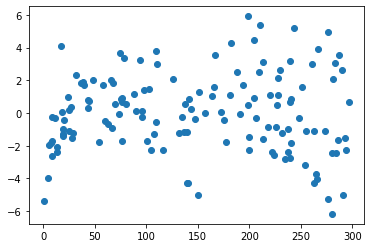

In [32]:
#Look for patterns in residuals(we should be able to identify)

plt.scatter(X_train,res)
plt.show()

### 5. Model Evaluation

In [38]:
#predictions on the test set(y_test_pred)
#evaluate the model, r-squared on the test

#add a contant to the test set
X_test_sm=sm.add_constant(X_test)

#pred on test
y_test_pred=lr_model.predict(X_test_sm)



C:\Users\ashan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#evaluate the model
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7921031601245658

In [40]:
# Mean Squared error
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

4.077556371826956

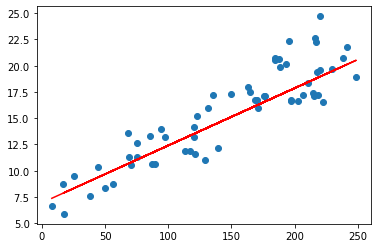

In [41]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

This shows that there is significant relationship between the ads on Televsion and the sales generated through them.

### Linear Regression using SKLearn

steps in sklean model building
1. Create an object of linear regression
2. Fit the model
3. See the params of the model, make predictions (train,test)
4. evaluate(r2,etc)


In [50]:
X_train_lm=X_train.values.reshape(-1,1)
X_train_lm.shape

(140, 1)

In [51]:
X_test_lm=X_test.values.reshape(-1,1)
X_test_lm.shape

(60, 1)

In [54]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train_lm,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [57]:
# make predictions

y_train_pred=lm.predict(X_train_lm)
y_test_pred=lm.predict(X_test_lm)

In [58]:
# Evaluate the model

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))


0.8157933136480389
0.7921031601245662
